In [155]:
%matplotlib inline

In [156]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



In [157]:

df = pd.read_csv("top_insta.csv")   
df.head()     

,rank,channel_info,influence_score,old_posts,posts,old_followers,followers,old_avg_likes,avg_likes,60_day_eng_rate,old_new_post_avg_like,new_post_avg_like,old_total_likes,total_likes,country
0,1,cristiano,92,3.3k,3300,475.8m,475800000,8.7m,8700000,1.39%,6.5m,6500000,29.0b,29000000000,Spain
1,2,kyliejenner,91,6.9k,6900,366.2m,366200000,8.3m,8300000,1.62%,5.9m,5900000,57.4b,57400000000,United States
2,3,leomessi,90,0.89k,890,357.3m,357300000,6.8m,6800000,1.24%,4.4m,4400000,6.0b,6000000000,NaN
3,4,selenagomez,93,1.8k,1800,342.7m,342700000,6.2m,6200000,0.97%,3.3m,3300000,11.5b,11500000000,United States
4,5,therock,91,6.8k,6800,334.1m,334100000,1.9m,1900000,0.20%,665.3k,665300,12.5b,12500000000,United States


In [158]:
df.drop(columns=[col for col in df.columns if 'old' in col], inplace=True)
df['country'].fillna('Unknown', inplace=True)
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300,475800000,8700000,1.39%,6500000,29000000000,Spain
1,2,kyliejenner,91,6900,366200000,8300000,1.62%,5900000,57400000000,United States
2,3,leomessi,90,890,357300000,6800000,1.24%,4400000,6000000000,Unknown
3,4,selenagomez,93,1800,342700000,6200000,0.97%,3300000,11500000000,United States
4,5,therock,91,6800,334100000,1900000,0.20%,665300,12500000000,United States


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    int64 
 4   followers          200 non-null    int64 
 5   avg_likes          200 non-null    int64 
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    int64 
 8   total_likes        200 non-null    int64 
 9   country            200 non-null    object
dtypes: int64(7), object(3)
memory usage: 15.8+ KB


In [160]:

country_groups = pd.DataFrame(df.groupby('country')['channel_info'].apply(list).reset_index())

if 'Unknown' not in country_groups['country'].values:
    country_groups.loc[len(country_groups)] = ['Unknown', []]

country_groups

,country,channel_info
0,Anguilla,[norafatehi]
1,Australia,[chrishemsworth]
2,Brazil,"[neymarjr, ronaldinho, whinderssonnunes, marcelotwelve, tatawerneck, larissamanoela, maisa, gusttavolima, mariliamendoncacantora, marinaruybarbosa, simonemendes, ivetesangalo, luansantana]"
3,British Virgin Islands,[mercedesbenz]
4,Canada,"[justinbieber, shawnmendes, danbilzerian]"
5,Colombia,"[maluma, jamesrodriguez10, nickyjampr]"
6,Czech Republic,[nattinatasha]
7,CÃ´te d'Ivoire,[hrithikroshan]
8,France,"[psg, paulpogba, louisvuitton, antogriezmann, zidane, nancyajram]"
9,Germany,[bmw]


In [161]:
country_counts = pd.DataFrame(df['country'].value_counts().reset_index())
country_counts

,country,count
0,United States,66
1,Unknown,62
2,Brazil,13
3,India,12
4,Indonesia,7
5,France,6
6,Spain,5
7,United Kingdom,4
8,Colombia,3
9,Canada,3


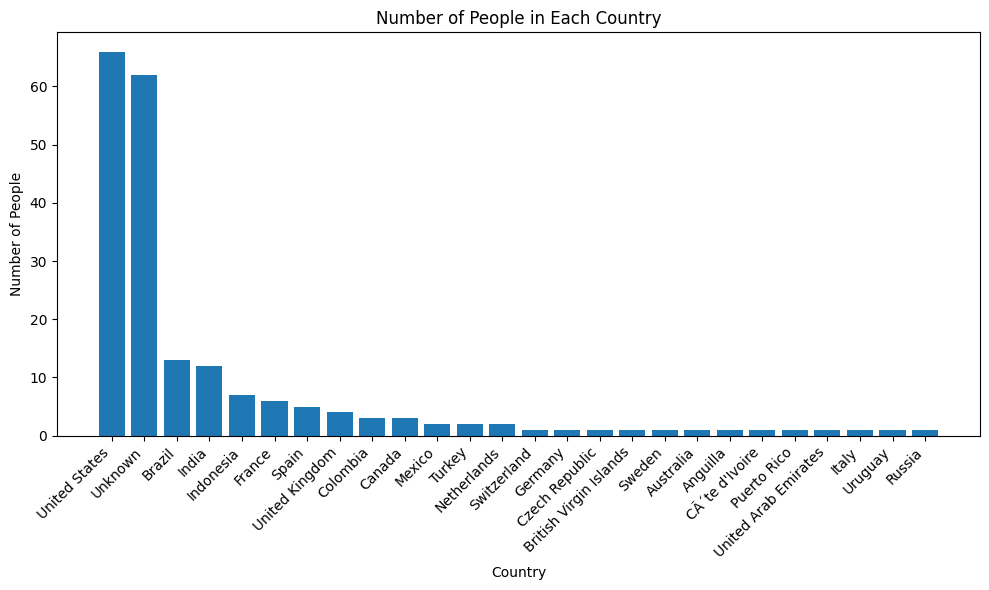

In [162]:

plt.figure(figsize=(10, 6))
plt.bar(country_counts['country'], country_counts['count'])
plt.xlabel('Country')
plt.ylabel('Number of People')
plt.title('Number of People in Each Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [163]:
new_features = df[['influence_score','posts','followers', 'avg_likes', 'total_likes']]

k = 4

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(new_features)

df['cluster'] = kmeans.labels_

print("Cluster Centers:")
kmeans.cluster_centers_

Cluster Centers:


c:\Users\14438\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[8.38500000e+01, 4.90025000e+03, 1.10372500e+08, 2.41396000e+06,
        6.55500000e+09],
       [9.02222222e+01, 5.34444444e+03, 2.65111111e+08, 3.77777778e+06,
        1.77555556e+10],
       [8.07133333e+01, 2.99306667e+03, 5.54320000e+07, 1.45708200e+06,
        1.68148333e+09],
       [9.10000000e+01, 6.90000000e+03, 3.66200000e+08, 8.30000000e+06,
        5.74000000e+10]])

In [164]:
cluster_counts = pd.DataFrame(df['cluster'].value_counts())
cluster_counts

,count
cluster,
2,150
0,40
1,9
3,1


In [165]:
clustered_df = df.groupby('cluster')['channel_info'].apply(list).reset_index()
pd.set_option('display.max_colwidth', None)

clustered_df.columns = ['Cluster', 'Influencers']
clustered_df

,Cluster,Influencers
0,0,"[leomessi, selenagomez, beyonce, khloekardashian, jlo, virat.kohli, kourtneykardash, kevinhart4real, iamcardib, kingjames, theellenshow, realmadrid, champagnepapi, fcbarcelona, billieeilish, nasa, priyankachopra, lalalalisa_m, gigihadid, nba, shawnmendes, jennierubyjane, tomholland2013, bts.bighitofficial, camila_cabello, raffinagita1717, anitta, maluma, psg, whinderssonnunes, 9gag, karolg, tatawerneck, ladygaga, jbalvin, 433, lelepons, haileybieber, travisscott, shaymitchell]"
1,1,"[cristiano, therock, kimkardashian, arianagrande, justinbieber, nickiminaj, neymarjr, zendaya, badgalriri]"
2,2,"[kendalljenner, natgeo, nike, taylorswift, mileycyrus, katyperry, ddlovato, chrisbrownofficial, dualipa, gal_gadot, vindiesel, Shakira, snoopdogg, davidbeckham, shraddhakapoor, victoriassecret, k.mbappe, nehakakkar, narendramodi, aliaabhatt, deepikapadukone, ronaldinho, emmawatson, katrinakaif, marvel, justintimberlake, willsmith, sooyaaa__, akshaykumar, jacquelinef143, roses_are_rosie, manchesterunited, anushkasharma, marcelotwelve, milliebobbybrown, karimbenzema, chrishemsworth, paulpogba, iamzlatanibrahimovic, leonardodicaprio, juventus, zacefron, bellahadid, beingsalmankhan, robertdowneyjr, sunnyleone, dishapatani, sergioramos, mosalah, ayutingting92, hudabeauty, adele, michelleobama, kritisanon, jamesrodriguez10, krisjenner, thv, charlidamelio, gucci, prillylatuconsina96, louisvuitton, paulodybala, blackpinkofficial, dovecameron, garethbale11, jokowi, nusr_et, harrystyles, vanessahudgens, 5-Minute Crafts GIRLY, zayn, larissamanoela, thenotoriousmma, daddyyankee, natgeotravel, nikefootball, stephencurry30, vancityreynolds, maisa, luissuarez9, gusttavolima, jannatzubair29, varundvn, hrithikroshan, nickyjampr, buzzfeedtasty, brunamarquezine, caradelevingne, kapilsharma, badbunnypr, britneyspears, j.m, mariliamendoncacantora, norafatehi, theweeknd, dior, ranveersingh, marinaruybarbosa, jenniferaniston, addisonraee, ...]"
3,3,[kyliejenner]
